<a href="https://colab.research.google.com/github/ebartolo783/Se-ales-y-sistemas/blob/main/Copy_of_parcial_1_se%C3%B1ales_y_sistemas_(Esteban_Bartolo_Salazar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.


## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - sede Manizales

# Instrucciones

-- Para recibir el crédito total, sus respuestas deben estar justificadas de manera clara, detallada y concreta, mostrando los procedimientos y razonamientos paso a paso.

-- Está permitido el uso de herramientas de inteligencia artificial (IA). Si las utiliza, por favor declare explícitamente cómo fueron empleadas en la resolución de cada pregunta. Incluya los prompts (consultas) y las iteraciones realizadas con las IA durante el desarrollo del parcial.

-- La entrega del parcial debe realizarse antes de las 23:59 del 5 de diciembre de 2024 al correo electrónico amalvarezme@unal.edu.co mediante un enlace de GitHub.

-- Los códigos deben estar debidamente comentados en las celdas correspondientes y explicados en celdas de texto (markdown). Los códigos que no incluyan comentarios ni discusiones no serán considerados en la evaluación final.

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

Procedimiento punto 1

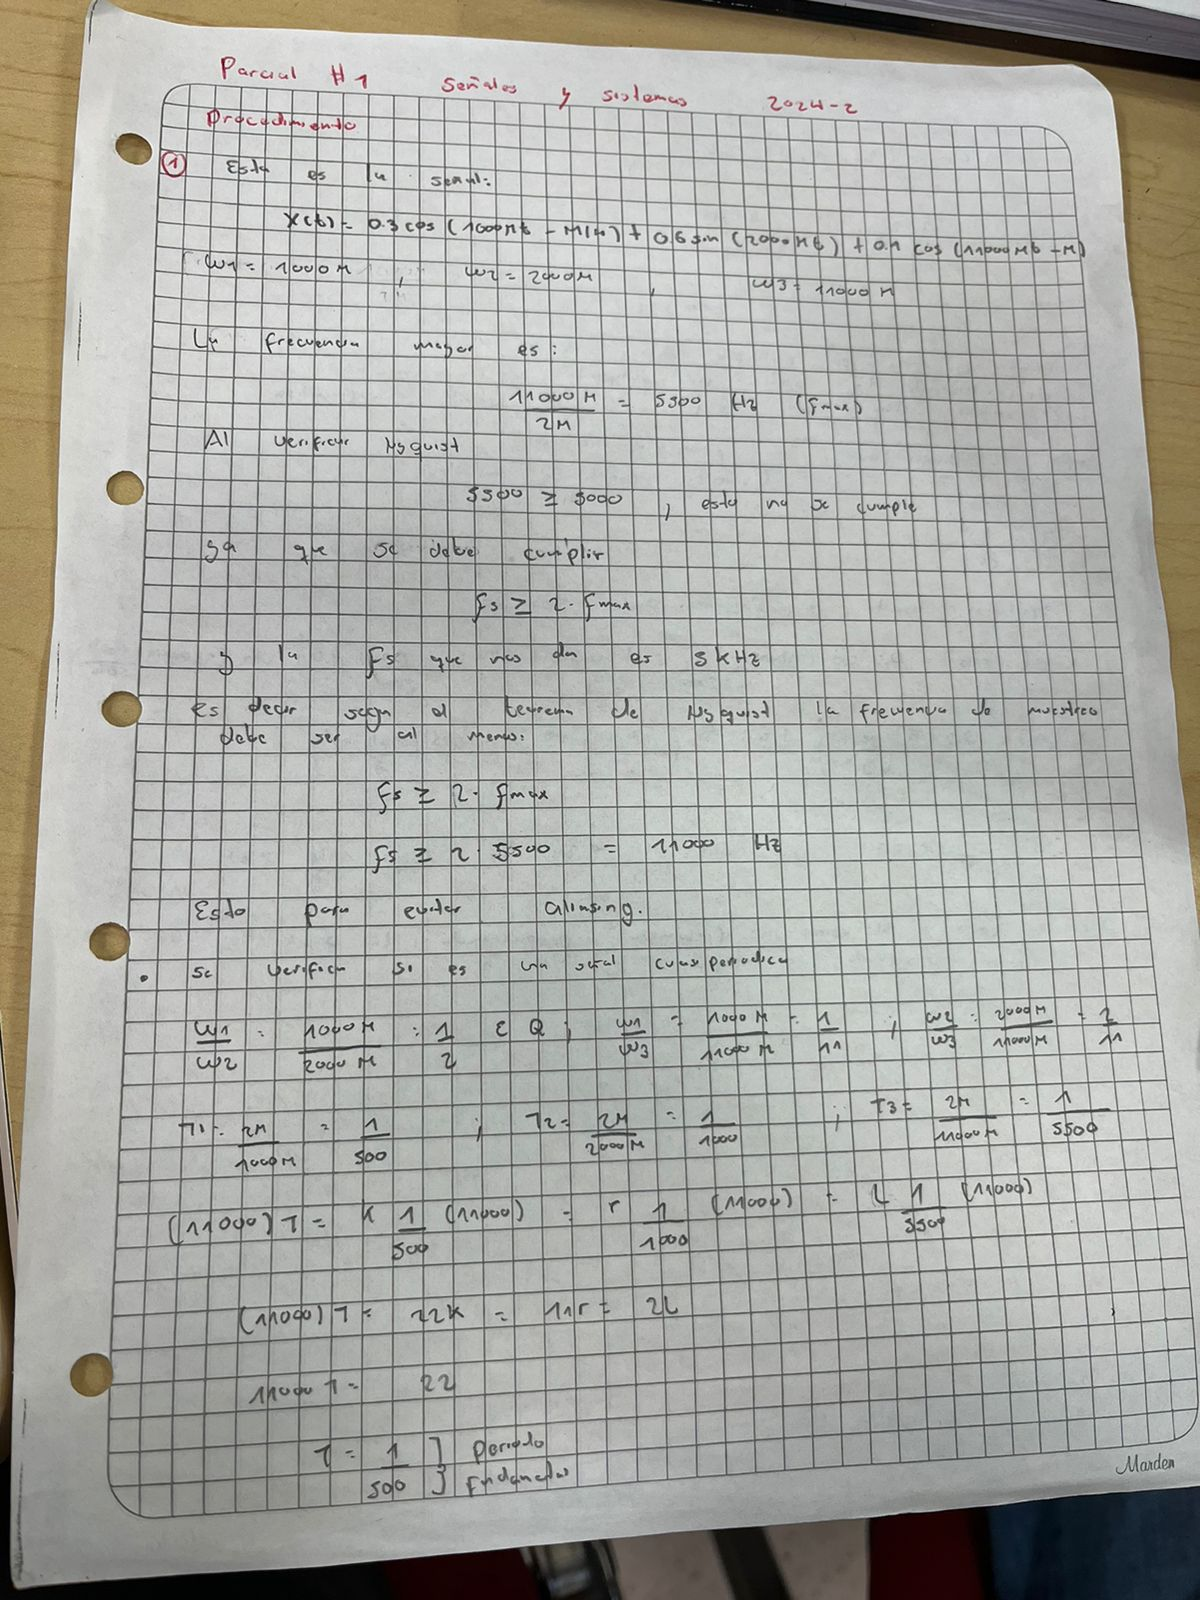

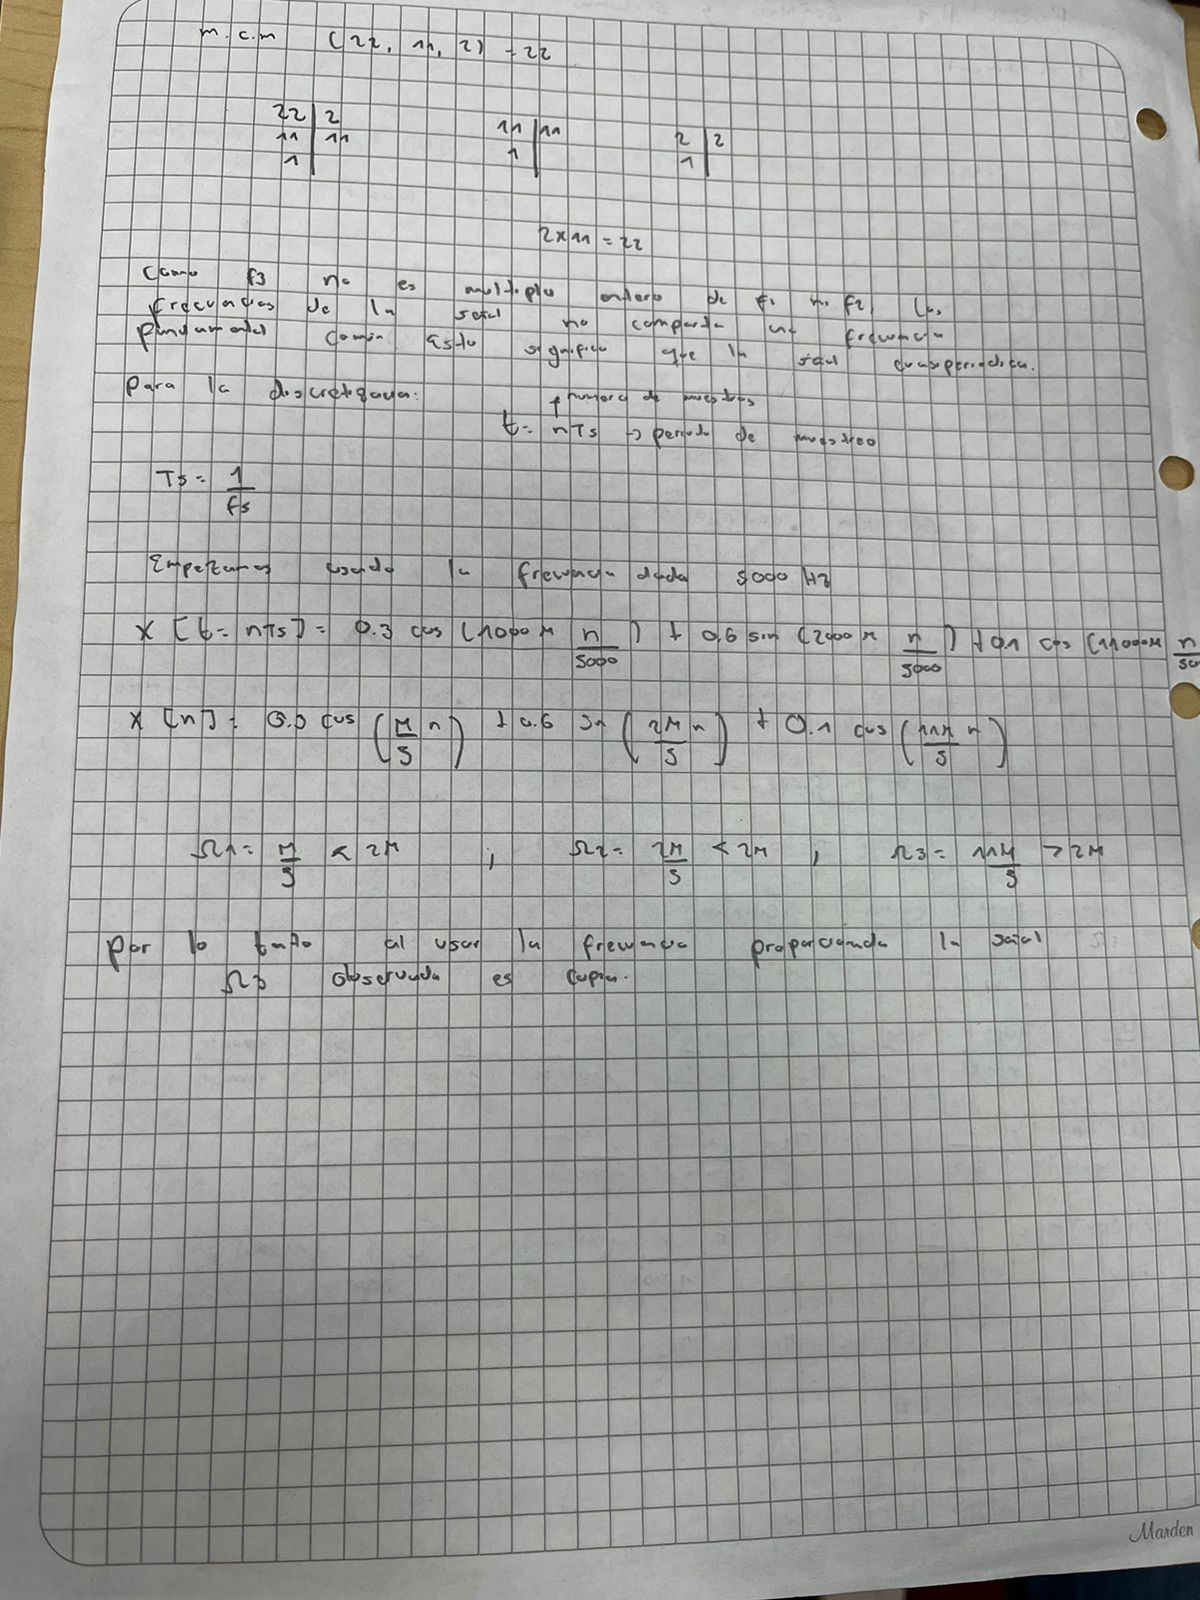

Codigo del punto 1

In [ ]:
#lo primero que se hace es importar las librerias de uso
import matplotlib.pyplot as plt #importamos la libreria matplotlib
import numpy as np #importamos la libreria numpy  para trabajar con arrreglos
from scipy.spatial.distance import cdist #importamos la funcion cdist de scipy.

# como comentario importante vamos a usar codigos separados para no obtener errores mas adelante

In [ ]:

# se definen las variables de la señal:

A1 = 0.3 #amplitud 1
A2 = 0.6 #amplitud 2
A3 = 0.1 #amplitud 3

#Ahora definimos las velocidades angulares

Va1 = 1000*np.pi #velocidad angular 1
Va2 = 2000*np.pi #velocidad angular 2
Va3 = 11000*np.pi #velocidad angular 3

K1 = -np.pi/4 #fase 1
K2 = 0 #fase 2
K3 = -np.pi # fase3

In [ ]:
# ahora definimos las frecuencias y los periodos
F1 = (Va1/(2*np.pi)) #frecuencia 1
F2 = (Va2/(2*np.pi)) #frecuencia 2
F3 = (Va3/(2*np.pi)) #frecuencia 3

P1 = 1/F1 #periodo 1
P2 = 1/F2 #Periodo 2
P3 = 1/F3 #Periodo 3

T = (1/500) # Periodo de la señal cuasiperiodica

# se imprimen las frecuencias y periodos
print("Las frecuencias son: ", F1, F2, F3)
print("Los periodos son: ", P1, P2, P3)

In [ ]:
# definimos la frecuencia y periodo de muestreo
Fs = float(input("Ingrese la frecuencia de muestreo: "))
while Fs < 2*max(F1,F2,F3):
  print("La frecuencia de muestreo debe ser mayor a 2 veces la frecuencia mas alta")
  Fs = float(input("Ingrese la frecuencia de muestreo: "))
Ts = 1/Fs # periodo de muestreo

print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)


In [ ]:
#definimos el vector de  tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante como lo pide el ejercicio

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

In [ ]:
# construimos la señal
u1 = A1*np.cos(Va1*tv+K1)
u2 = A2*np.sin(Va2*tv+K2)
u3 = A3*np.cos(Va3*tv+K3)
U = u1 + u2 + u3
plt.figure(figsize=(18, 9))
plt.plot(tv,U,'r',label='$x(t) = 0.3\cos(1000π*t-π/4)- 0.6 \sin(2000πt)+ 0.1\cos(11000πt-π)$')
plt.plot(tv,u1,'b',label='$x_1(t) = 0.3\cos(1000πt-π/4)$')
plt.plot(tv,u2,'g',label='$x_2(t) = 0.6\sin(2000πt)$')
plt.plot(tv,u3,'y',label='$x_3(t) = 0.1\cos(11000πt-π)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#Como un segundo paso creamos el cero y pendiente que es el proceso de digitalizacion de la señal segun el ejercicio 1
#creaamos funcion en python
#reutilizamos le funciòn realizada por el profesor
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv


In [ ]:
# construimos el cero y pendiente
ymin = float(input("Ingrese el valor minimo de la señal: "))
ymax = float(input("Ingrese el valor maximo de la señal: "))
while ymax < ymin:
  print("El valor maximo debe ser mayor al minimo")
  ymax = float(input("Ingrese el valor maximo de la señal: "))
xcp = my_ceropen(U, ymin, ymax)
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [ ]:
numero_bits = int(input("Ingrese el numero de bits: "))# numero de bits que nos da el ejercicio
num_estados = 2**numero_bits #numero de estados de cuantificacion
vq = np.linspace(ymin,ymax,num_estados) #vector llamado vq con los niveles de cuantificacion

In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia minima
  return vq[ind]

In [ ]:
# recorremos el vector cero y spam para cuantizar
for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

In [ ]:
# por ultimo graficamos las señales

plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización


for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u_1 = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u_1, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Primero vamos a verificar que el sistema es SLIT mirando si cumple la linealidad y la invariancia en el tiempo


Linealidad: $y(t)=H \{a1x1(t)+a2x2(t)\} = a1H\{x1(t)\}+a2H\{x2(t)\}$

Invariancia con el tiempo: $y(t) = H\{x(t)\} ; y(t-to) = H\{x(t-to)\}$

Primero verificamos la linealidad del sistema con otra señal

In [ ]:
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo

a1 = 5
a2 = 6

signal_u = np.heaviside(t,1) # función heaviside
signal_u_scaled = a1*signal_u
y_u = my_system.predict(signal_u)
y_u_scaled = my_system.predict(signal_u_scaled)

signal_v = np.cos(2*np.pi*t)
signal_v_scaled = a2*signal_v
y_v = my_system.predict(signal_v)
y_v_scaled = my_system.predict(signal_v_scaled)

P1 = a1*y_u + a2*y_v
P2 = y_u_scaled + y_v_scaled

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, P1, label='$a1H\{x1(t)\}+a2H\{x2(t)\}$')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,P2, label='$H \{a1x1(t)+a2x2(t)\}$')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Ahora se verifica la invariancia con el tiempo

In [ ]:
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
to = 0.0058
signal_u = np.heaviside(t-to,1) # función heaviside
y_u = my_system.predict(signal_u)



# Visualización de las señales

fig, axs = plt.subplots(2,1, figsize=(10, 6))
axs[0].stem(t, signal_u, label='Señal de entrada desplazada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Como ya se verifico la invariancia con el tiempo y la linealidad, se procedera a determinar su respuesta al impulso

In [ ]:
h_n = np.diff(y_u_1) #encontramos la respuesta al impulso derivando la salida del sistema
plt.figure()

# Ajustamos el tamaño de t para que coincida con h_n
t_adjusted = t[:-1]  # Eliminamos el último elemento de t

plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

In [ ]:
n = np.round(t*fs)
n

In [ ]:
x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n)
plt.figure()
plt.plot(n, x_n, 'g', label='Señal de entrada')
plt.stem(n, x_n, label='Señal de entrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Entrada del sistema y[n]')
plt.grid()

print(x_n)

In [ ]:
# Realizar la convolución
y_output = np.convolve(x_n, h_n, mode='same') / fs

# Visualización de la salida
plt.figure()
plt.plot(n, y_output, 'g', label='Salida del sistema')
plt.stem(n, y_output, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()